
Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98   

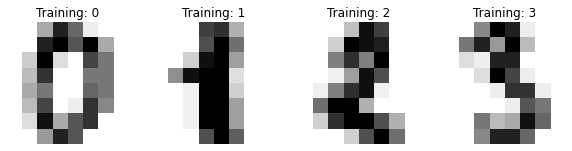

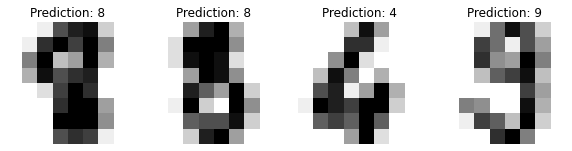

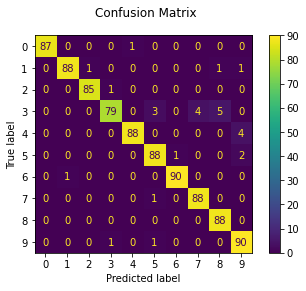

In [ ]:
"""
================================
Recognizing hand-written digits
================================

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.
"""

print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

###############################################################################
# Digits dataset
# --------------
#
# The digits dataset consists of 8x8
# pixel images of digits. The ``images`` attribute of the dataset stores
# 8x8 arrays of grayscale values for each image. We will use these arrays to
# visualize the first 4 images. The ``target`` attribute of the dataset stores
# the digit each image represents and this is included in the title of the 4
# plots below.
#
# Note: if we were working from image files (e.g., 'png' files), we would load
# them using :func:`matplotlib.pyplot.imread`.

digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

###############################################################################
# Classification
# --------------
#
# To apply a classifier on this data, we need to flatten the images, turning
# each 2-D array of grayscale values from shape ``(8, 8)`` into shape
# ``(64,)``. Subsequently, the entire dataset will be of shape
# ``(n_samples, n_features)``, where ``n_samples`` is the number of images and
# ``n_features`` is the total number of pixels in each image.
#
# We can then split the data into train and test subsets and fit a support
# vector classifier on the train samples. The fitted classifier can
# subsequently be used to predict the value of the digit for the samples
# in the test subset.

# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

###############################################################################
# Below we visualize the first 4 test samples and show their predicted
# digit value in the title.

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

###############################################################################
# :func:`~sklearn.metrics.classification_report` builds a text report showing
# the main classification metrics.

print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

###############################################################################
# We can also plot a :ref:`confusion matrix <confusion_matrix>` of the
# true digit values and the predicted digit values.

disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


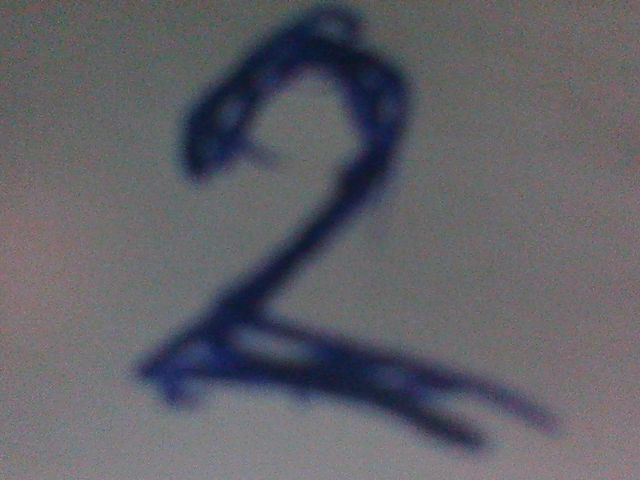

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from google.colab.patches import cv2_imshow


[2]


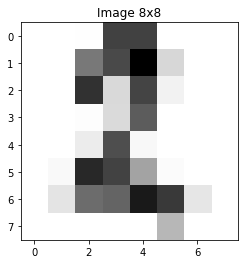

In [ ]:
# read image-load an image in grayscale mode
# from skimage.transform import resize, pyramid_reduce
import numpy as np
from PIL import Image, ImageOps

image = cv2.imread('/content/photo.jpg',0)
image_blur = cv2.GaussianBlur(image, (5, 5), 0)
ret, ostu_thresh = cv2.threshold(image_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
data = Image.fromarray(ostu_thresh)
data.save('result.jpg')
imgResult = Image.open('result.jpg')
imgResult_last = ImageOps.invert(imgResult)
imgResult_last.save('lastResult.jpg')

#get result
last = cv2.imread('lastResult.jpg',0)
last = cv2.resize(last,(8,8),interpolation= cv2.INTER_AREA)
plt.subplot(1, 1, 1 )
plt.imshow(last, cmap=plt.cm.binary)
plt.title("Image 8x8")
last = last/16
last = last.reshape(1,64)
print(clf.predict(last))

plt.show()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  22225      0 --:--:-- --:--:-- --:--:-- 22225


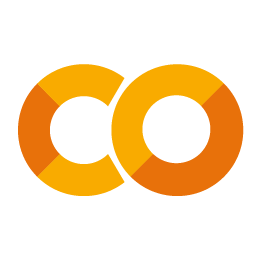

In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

Phân tích thông qua thực nghiệm chạy thử :
-Kết quả chạy thực tế với webcam của laptop và giấy viết tay là khá tốt
-Kết quả này dựa vào tính chính xác của của chương trình khi từ ngữ được chụp từ webcam có nét vẽ tự nhiên, tuy nhiên chương trình này vẫn cần phải cải thiện hơn vì cỡ chữ vẫn phải lớn so với bình thường một ít để có thể nhận dạng được
-Nếu như hình ảnh được chụp đủ rõ và có đủ data cho model train thì việc dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà là có thể 